## STAGE B QUIZ SOLUTIONS

### THE NON-CODING PART OF THE QUIZ

#### Question 1:
In the Linear Regression, L2 regularization is equivalent to imposing a:

#### Answer:
Gaussian prior


#### Question 2:
Cross validation:

#### Answer:
is guaranteed to prevent overfitting

#### Question 3:
Ridge regression:

#### Answer:
Reduces variance at the expence of higher bias

#### Question 4:
In the different terms of the bias-tradeoff, which of the following is substantially more harmful to the test error than the training error?

#### Answer:
Variance

#### Question 5:
What can you use to find the best fit line for Linear Regression?

#### Answer:
Least Square Error

#### Question 6:
Which of the following is true about outliers in linear regression?

#### Answer:
Linear regression is sensitive to outliers. 

(The line of best fit passes through the observation defined by the means of X and Y values. Mean is sensitive to outliers. As a result of this, linear regression is sensitive to outliers).

#### Question 7 :
How many coefficients do you need to estimate a simple linear regression model?

#### Answer:
2 (The slope and intercept are the required coefficients)

#### Question 8:
Adding more bias functions in a linear model:

#### Answer:
Decrease model bias

#### Question 9:
A best fit line relating X and Y has a R-squared value of 0.75.
How do you interpret this information?

#### Answer:
75% of the variance in Y is explained by X.

#### Question 10:
The Lasso can be interpreted as least-squares regression where:

#### Answer:
weights are regularized with the L1 norm.

#### Question 11:
Which of these is not an assumption of linear regression?

#### Answer:
Heteroscedasticity

(Linear regression assumes homoscedasticity, i.e. constant variance)

### PREPARING THE DATASET FOR THE CODING PART OF THE QUIZ

In [1]:
# Importing the necessary libraries and modules

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Importing the dataset

energy_dataset = pd.read_csv('energy_data.csv')

In [3]:
# Viewing the first five rows of the imported dataset

energy_dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Viewing the summary information about the imported dataset

energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
# Viewing the summary stattistics of the imported dataset

energy_dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Checking for number of null values in the imported dataset

energy_dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
# Viewing the number of unique values in the imported dataset

energy_dataset.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


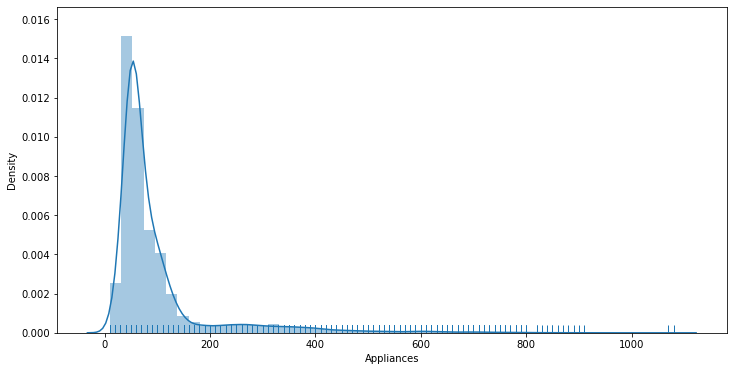

In [8]:
# Visualizing the distribution plot of the target variable, 'Appliances'

plt.figure(figsize=(12,6))

sns.distplot(energy_dataset['Appliances'], rug=True)
plt.show()

The visualization above shows that the distribution of the target variable, 'Appliances', is skewed (positive) and also has outliers.

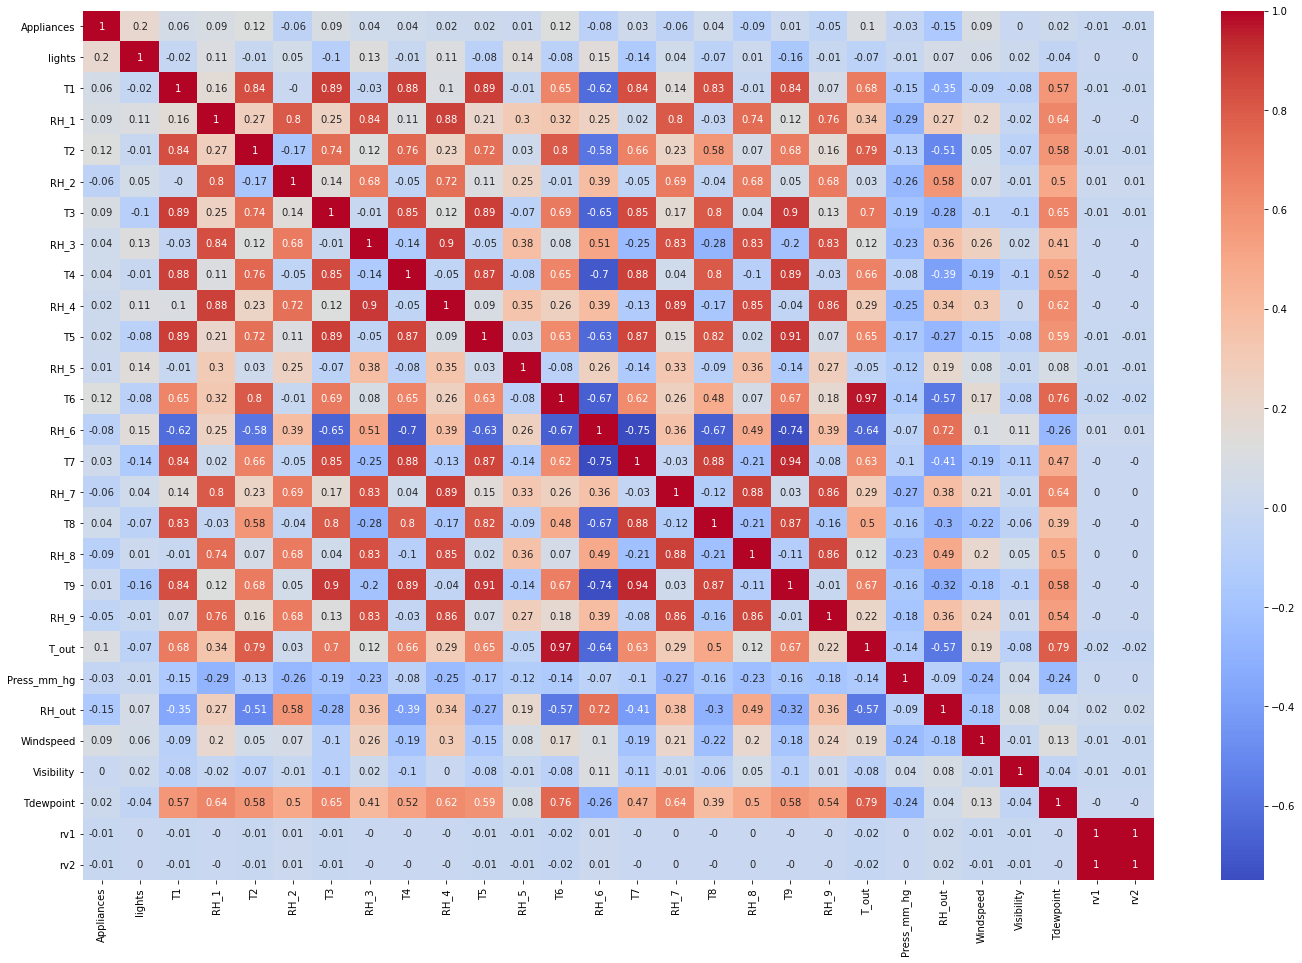

In [9]:
# Visualizing the correlations of the variables

plt.figure(figsize=(24,16))

sns.heatmap(round(energy_dataset.corr(),2), cmap='coolwarm', annot=True)

plt.show()

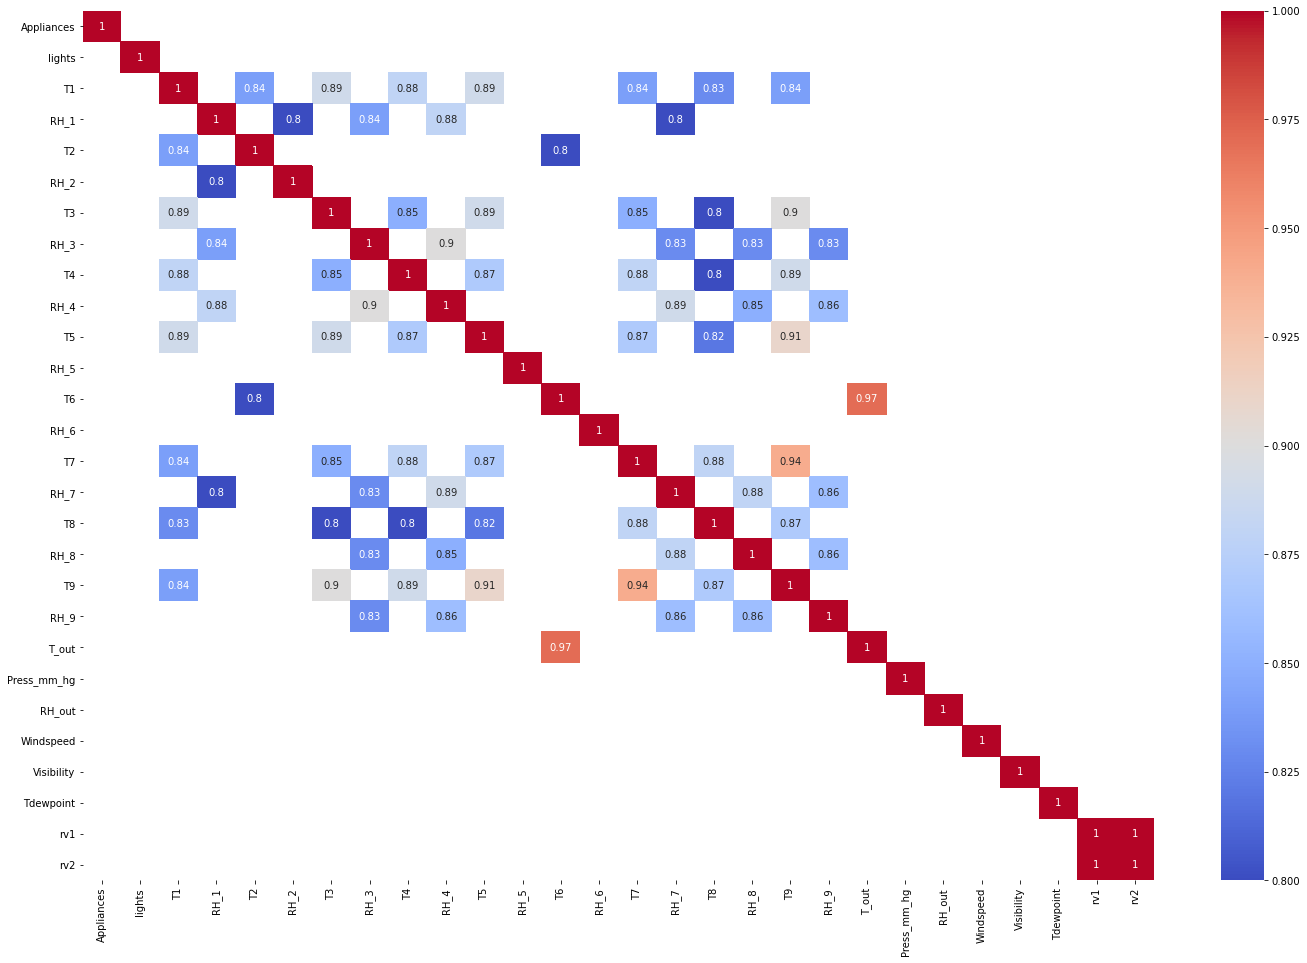

In [10]:
# For correlation coefficients greater than 0.79

plt.figure(figsize=(24,16))

corr_data = round(energy_dataset.corr(),2)

sns.heatmap(corr_data[corr_data > 0.79], cmap='coolwarm', annot=True)

plt.show()

### Data Manipulation

In [11]:
# Dropping the 'lights' column

energy_dataset.drop(['lights'], axis=1, inplace=True)

In [12]:
# Dropping the 'date' column

energy_dataset.drop(['date'], axis=1, inplace=True)

In [13]:
# Veiwing the columns of the modified dataset

energy_dataset.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Data Preprocessing and normalization

In [14]:
# Normalizing the dataset to a common scale

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(energy_dataset), columns=energy_dataset.columns)

In [15]:
# Separating the normalized dataset into features (predictors) and target variables

features_df = normalized_df.drop(columns=['Appliances'])

target_df = normalized_df['Appliances']

In [16]:
# Splitting the normalized dataset into train-and-test datasets

x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 42)

In [17]:
# Establishing the regression model

linear_model = LinearRegression()

### Question 12:

Compute R^2 value from the linear model, fitting in 'T2' and 'T6'

In [18]:
# Establishing the train and test variables, fitting in 'T2' and 'T6'

T2_x_train = x_train[['T2']]
T6_y_train = x_train[['T6']]

T2_x_test = x_test[['T2']]
T6_y_test = x_test[['T6']]

linear_model.fit(T2_x_train, T6_y_train)

predicted_y = linear_model.predict(T2_x_test)

In [19]:
R2_score = round(r2_score(T6_y_test, predicted_y), 2)

R2_score

0.64

### Question 13:

Compute MAE value for the normalized dataset

In [20]:
linear_model.fit(x_train, y_train)

y_predict_2 = linear_model.predict(x_test)

MAE = round(mean_absolute_error(y_test, y_predict_2), 2)

MAE

0.05

### Question 14:

Compute the Residual Sum of Squares for the normalized dataset

In [21]:
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

RSS = round(np.sum(np.square(y_test - y_predict)), 2)

In [22]:
RSS

45.35

### Question 15:

Compute the Root Mean Square Error for the normalized dataset

In [23]:
linear_model.fit(x_train, y_train)

y_predict_2 = linear_model.predict(x_test)

RMSE = round(np.sqrt(mean_squared_error(y_test, y_predict_2)), 3)

In [24]:
RMSE

0.088

### Question 16:

Compute the Coefficient of Determination (r2_score) for the normalized dataset

In [25]:
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

R2_score = round(r2_score(y_test, y_predict), 2)

In [26]:
R2_score

0.15

### Question 17:

Compute Feature Weights from the linear model

In [27]:
linear_model.fit(x_train, y_train)

def get_feature_weights(model, feature, column_name):
    weights_array = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights_array).reset_index()
    weights_df.columns = ['Features', column_name]
    weights_df[column_name].round(3)
    return weights_df

In [28]:
linear_model_weights = get_feature_weights(linear_model, x_train, 'Linear_model_weight')

In [29]:
linear_model_weights

,Features,Linear_model_weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


From the table above, RH_2 and RH_1 have the lowest and highest weights respectively.

### Question 18

Train a Ridge Regression Model with an alpha value of 0.4, and obtain the RMSE for the model. Compare the value of RMSE with the one obtained earlier.

In [30]:
ridge_model = Ridge(alpha=0.4)

ridge_model.fit(x_train, y_train)

ridge_model_prediction = ridge_model.predict(x_test)

ridge_rmse = round(np.sqrt(mean_squared_error(y_test, ridge_model_prediction)), 3)

In [31]:
ridge_rmse

0.088

From the results obtained, there is NO change in the RMSE values.

### Question 19:

Train a Lasso Model with an alpha value of 0.001, and obtain new feature weights with it. Determine the number of non_zero features in the DataFrame.

In [32]:
lasso_model = Lasso(alpha=0.001)

lasso_model.fit(x_train, y_train)

def get_feature_weights(model, feature, column_name):
    weights_array = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights_array).reset_index()
    weights_df.columns = ['Features', column_name]
    weights_df[column_name].round(3)
    return weights_df

In [33]:
lasso_model_weights = get_feature_weights(lasso_model, x_train, 'Lasso_model_weights')

In [34]:
lasso_model_weights

,Features,Lasso_model_weights
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [35]:
non_zero_weights = lasso_model_weights[lasso_model_weights['Lasso_model_weights'] != 0]

In [36]:
non_zero_weights

,Features,Lasso_model_weights
0,RH_out,-0.049557
1,RH_8,-0.000110
24,Windspeed,0.002912
25,RH_1,0.017880


In [37]:
len(non_zero_weights)

4

### Question 20:

Compute RMSE with Lasso model

In [38]:
lasso_model_prediction = lasso_model.predict(x_test)

lasso_rmse = round(np.sqrt(mean_squared_error(y_test, lasso_model_prediction)), 3)

In [39]:
lasso_rmse

0.094